# In Class Notebook, Week 02

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week02/inClass_week02.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

Hey I'm writing a thing!

In [2]:
import matplotlib.pyplot as plt # shorthand so I don't have to type as much
import numpy as np

In [3]:
from PIL import Image

In [4]:
# my directory structure on a mac
im = Image.open('/Users/jnaiman/Downloads/stitch_reworked.png')

# windows it will be like: C://jnaiman/Downloads ?

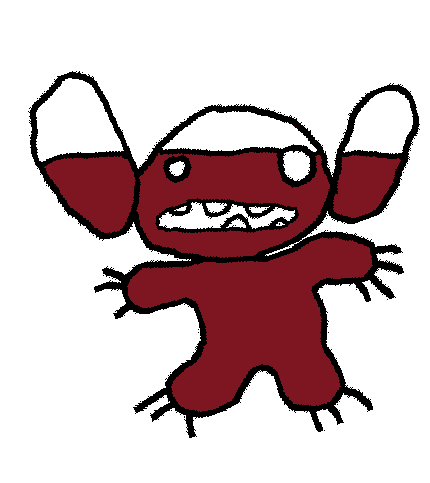

In [5]:
im

In [6]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [33]:
im_data = np.array(im)

In [10]:
im_data.shape # 483 y-pixels, 430 x-pixels, 4 color channels (RGBA)

(483, 430, 4)

In [11]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [13]:
im_data.reshape(-1, im_data.shape[2]) # I've used reshape to turn my 
#                                       3D object into a list of pixels

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [14]:
im_data.reshape?

In [17]:
np.unique(im_data.reshape(-1,im_data.shape[2]),axis=0)
# this unravels along the "long" list of pixels and looks for unique 4-color combos

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

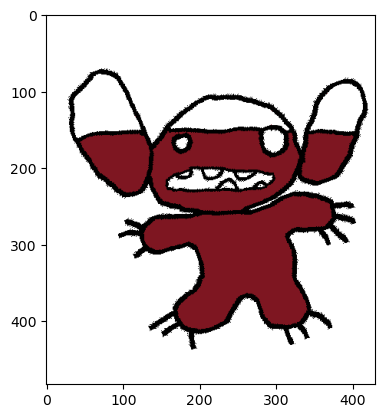

In [18]:
plt.imshow(im_data)

We have 4 colors, but one is perfectly see-through (Alpha channel = 0), what pixels are those?

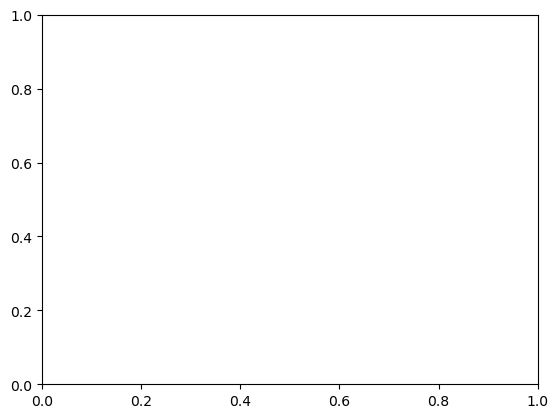

In [19]:
fig, ax = plt.subplots()

In [20]:
ax

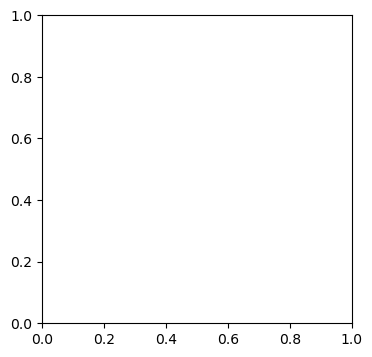

In [23]:
fig, ax = plt.subplots(figsize=(4,4))

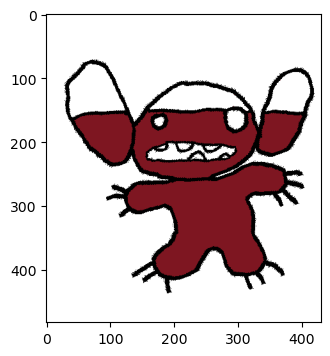

In [25]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(im_data)
plt.show() # for our purposes this gets rid of memory address

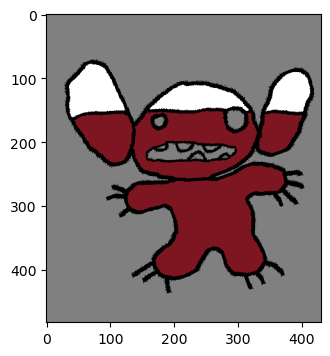

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_facecolor('gray')
ax.imshow(im_data)
plt.show()

Making a boolean mask to filter out only the good pixels:

In [34]:
# 255, 255, 255, 255 = pixels that are "good"
reds_good_mask = im_data[:,:,0] == 255
#reds_good_mask = im_data[:,:,0] = 255 messed up my assignment vs. boolean comparison
#. so, I had to go back an re-read in my data

# im_data[: means all of the y-pixels (rows), : means all of the x-pixels (columns), 
#.        0 means I'm only looking at my first color channel (R of RGBA)]

In [35]:
reds_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [37]:
reds_good_mask = im_data[:,:,0] == 255
green_good_mask = im_data[:,:,1] == 255
blue_good_mask = im_data[:,:,2] == 255
alpha_good_mask = im_data[:,:,3] == 255

pixel_mask_good = reds_good_mask & green_good_mask & blue_good_mask & alpha_good_mask

In [38]:
pixel_mask_good

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [39]:
ngood = len(im_data[pixel_mask_good])

In [40]:
ngood

11929

In [41]:
im_data_masked_good = im_data.copy() # copying instead of over-writing our image
im_data_masked_good[~pixel_mask_good] = 0 # not-good mask pixels set to see-through

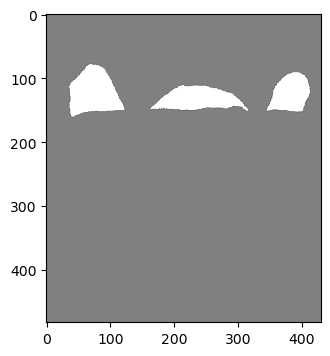

In [43]:
fig, ax = plt.subplots(figsize=(4,4)) # create image
ax.set_facecolor('gray') # set facecolor to gray (background)
ax.imshow(im_data_masked_good) # using masked image with non-good set to see-through, plot
plt.show()

In [45]:
#       [126,  22,  33, 255],
reds_bad_mask = im_data[:,:,0] == 126
green_bad_mask = im_data[:,:,1] == 22
blue_bad_mask = im_data[:,:,2] == 33
alpha_bad_mask = im_data[:,:,3] == 255

pixel_bad_mask = reds_bad_mask & green_bad_mask & blue_bad_mask & alpha_bad_mask

In [46]:
nbad = len(im_data[pixel_bad_mask])

In [47]:
nbad

40949

In [49]:
ngood/(nbad+ngood)

0.22559476530882408

## RGB(A) color deconstruction

In [50]:
im_data.shape

(483, 430, 4)

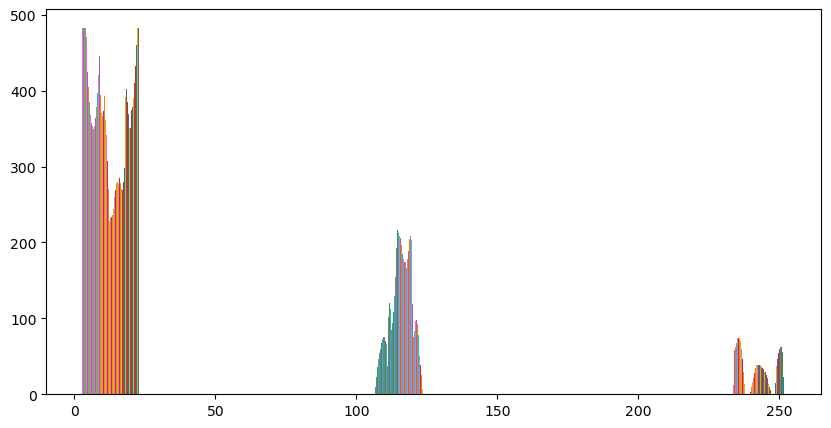

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(im_data[:,:,0]) # red channel only
plt.show()

In [52]:
im_data[:,:,0].shape

(483, 430)

In [53]:
im_data[:,:,0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [54]:
im_data[:,:,0].ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

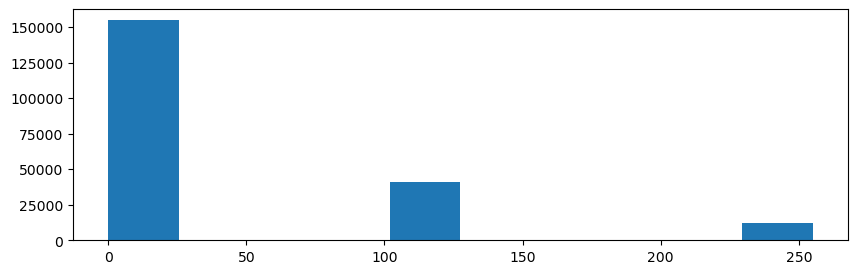

In [57]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten()) # this "flattens" our red channel into a 1D array
plt.show()

In [56]:
ax.hist?

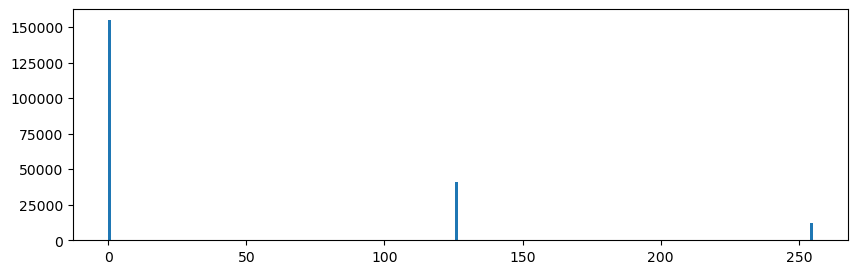

In [59]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256)
plt.show()

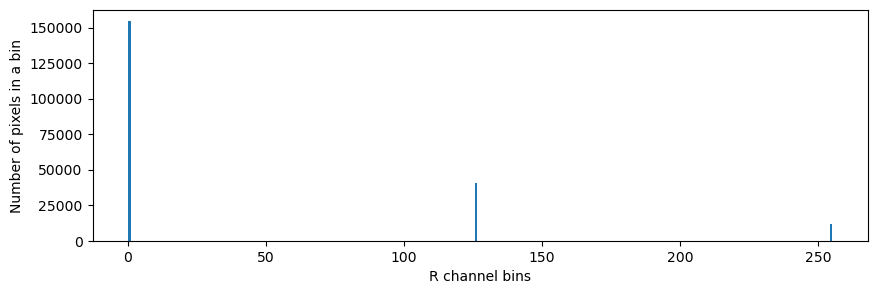

In [60]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256)
ax.set_xlabel('R channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

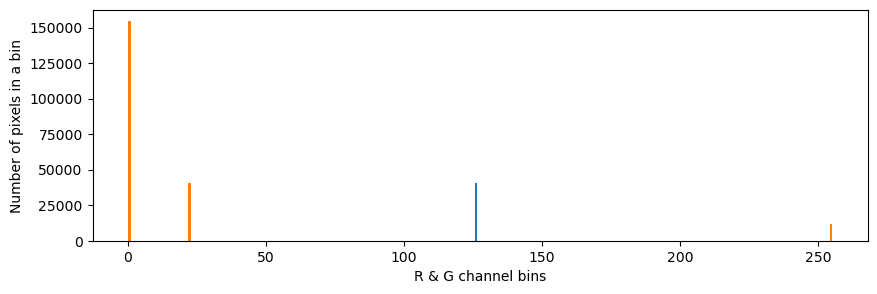

In [61]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256) # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256) # 1= Green channel
ax.set_xlabel('R & G channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

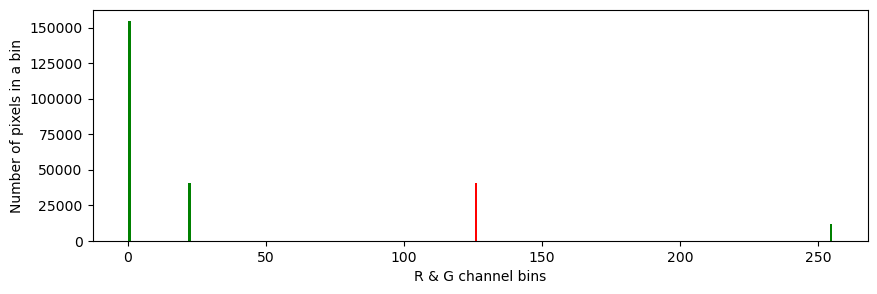

In [62]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1= Green channel
ax.set_xlabel('R & G channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

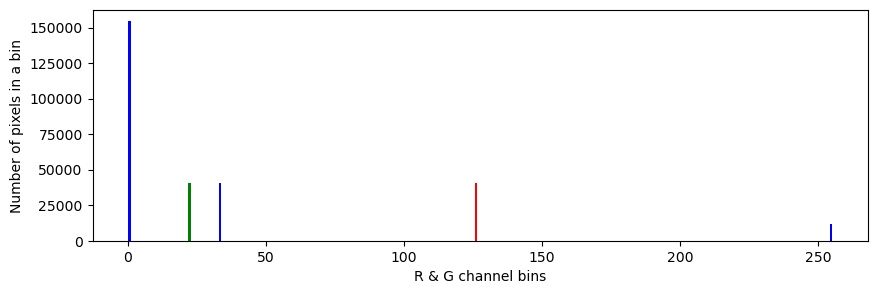

In [63]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1= Green channel
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2= Blue channel
ax.set_xlabel('R & G channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

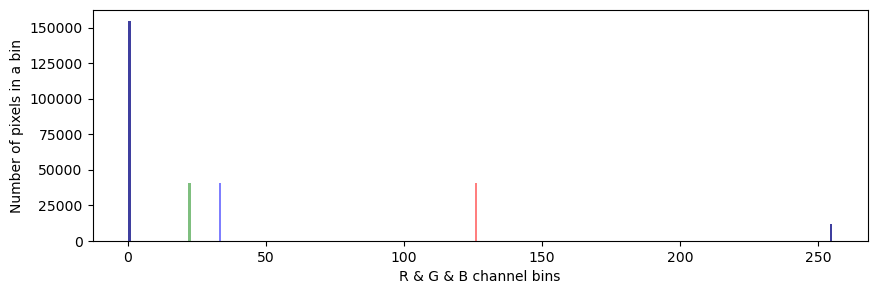

In [65]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256,color='red',alpha=0.5) # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green',alpha=0.5) # 1= Green channel
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue',alpha=0.5) # 2= Blue channel
ax.set_xlabel('R & G & B channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

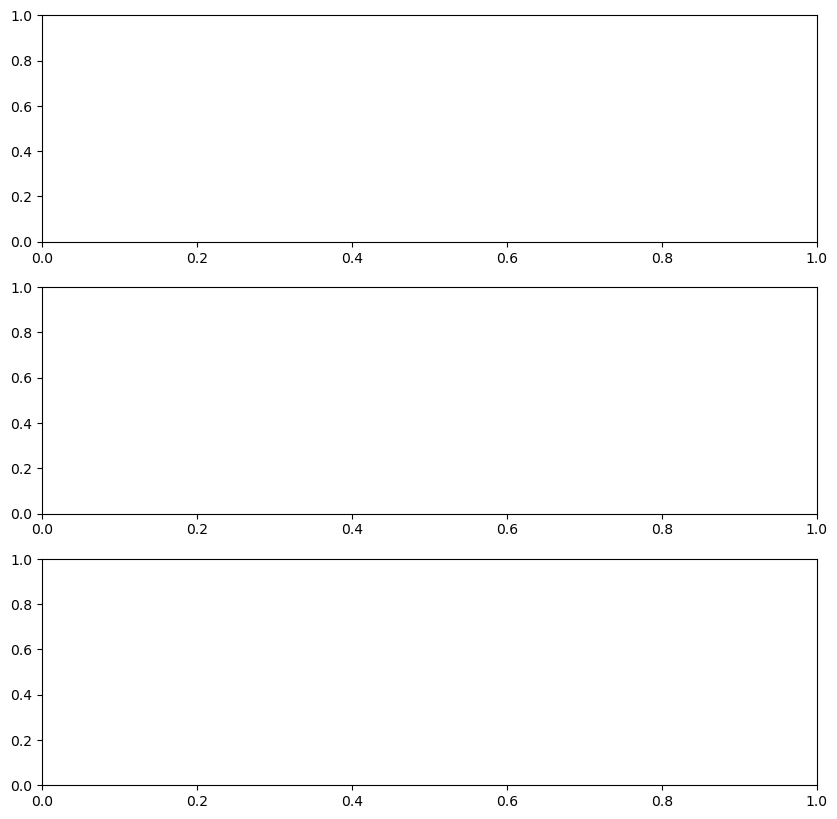

In [66]:
fig, ax = plt.subplots(3,1,figsize=(10,10))

In [67]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9e9a91490>,
      dtype=object)